## Module 2 - Basic Visualization tools (Area Plots, Histograms, Bar charts)

### Coding assignment completed by - Om

In [17]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Get & explore the dataset

df = pd.read_excel("Canada.xlsx", 
                   sheet_name=1, 
                   skiprows=20, 
                   skipfooter=2)

df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [19]:
# Modify dataset such as renaming colums and changing index column 

df.rename(columns={'OdName':"Country", 
                   "AreaName":"Continent", 
                   "RegName": 'Region'}, 
          inplace=True)

df.drop(['Coverage', 'Type', 'AREA', 'REG', 'DEV'], 
        axis=1, 
        inplace=True)

df.set_index('Country', inplace=True)

# View the dataset entries
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [20]:
# Check if all column names are string
all(isinstance(column, str) for column in df.columns)

False

In [21]:
# Convert all column names to String
df.columns = list(map(str, df.columns))

all(isinstance(column, str) for column in df.columns)

True

In [22]:
# Add Total column to dataset 

df['Total'] = df.sum(axis = 1)
df.head()

/var/folders/s3/dbk_7fz97w920m3grmvqvx8w0000gq/T/ipykernel_44495/834606433.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Total'] = df.sum(axis = 1)


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [23]:
# Define the years variable with the string from all the years

years = list(map(str, range(1980,2014)))
print(years)

['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


### Data Visualization using matplotlib & Seaborn

We will be visualizing the following plots: 
<ol>
    <li>Area plots</li>
    <li>Histograms</li>
    <li>Bar charts</li>
</ol>


In [24]:
mpl.style.use('ggplot')

## Area Plots
Area plots are similar to Line plots thus known as Stacked Line plot or Area plot.

**Question:** Plot area plot for top 5 countries with most immigrants.

In [57]:
# Sort countries
df.sort_values(['Total'], ascending=False, inplace=True)

df_top5 = df.head(5)
df_top5 = df_top5[years]
df_top5 = df_top5.transpose()

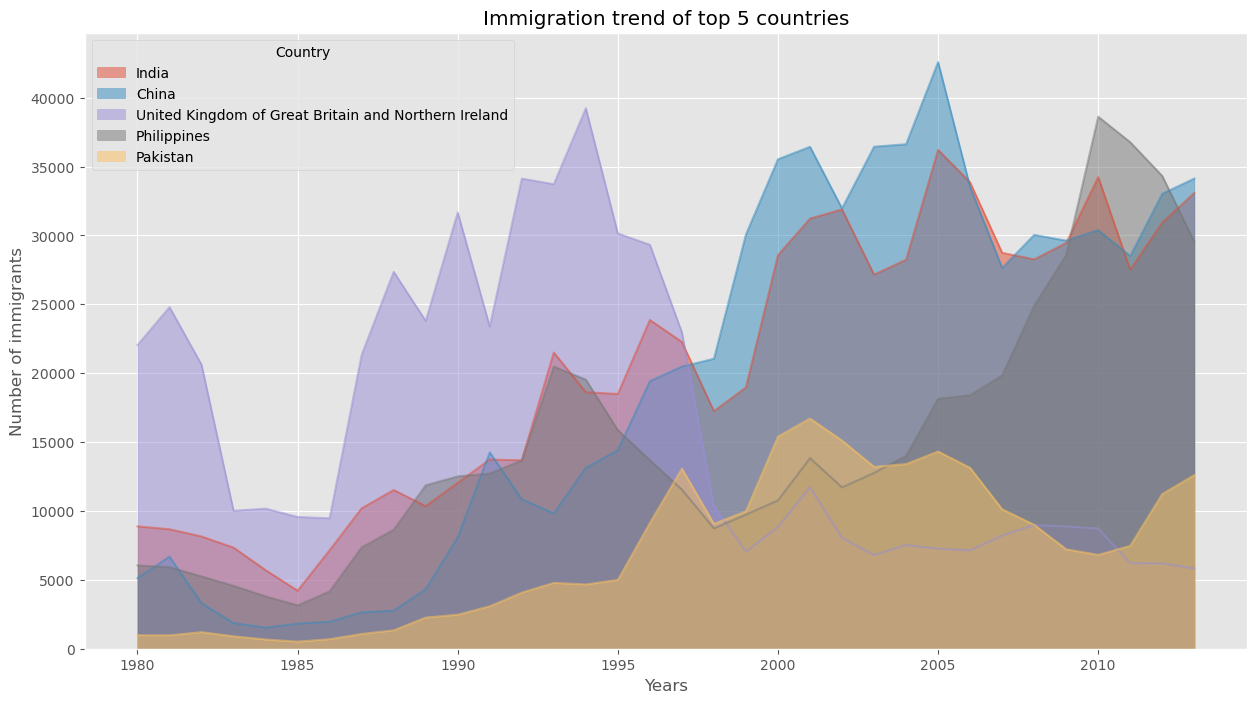

In [59]:
# Plot the Area plot using matplotlib 

df_top5.plot(kind="area", stacked=False, figsize = (15,8))
plt.title("Immigration trend of top 5 countries")
plt.ylabel("Number of immigrants")
plt.xlabel('Years')
plt.show()

#### Seaborn doesn't have fucntion for area plot thus only matplotlib can be used for plotting Area plots

**Question**: Create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013. Use a transparency value of 0.55.

In [68]:
# Contribution should be least means the tail of the sorted dataset

df_last5 = df.tail(5)
df_last5 = df_last5[years]
df_last5 = df_last5.transpose()

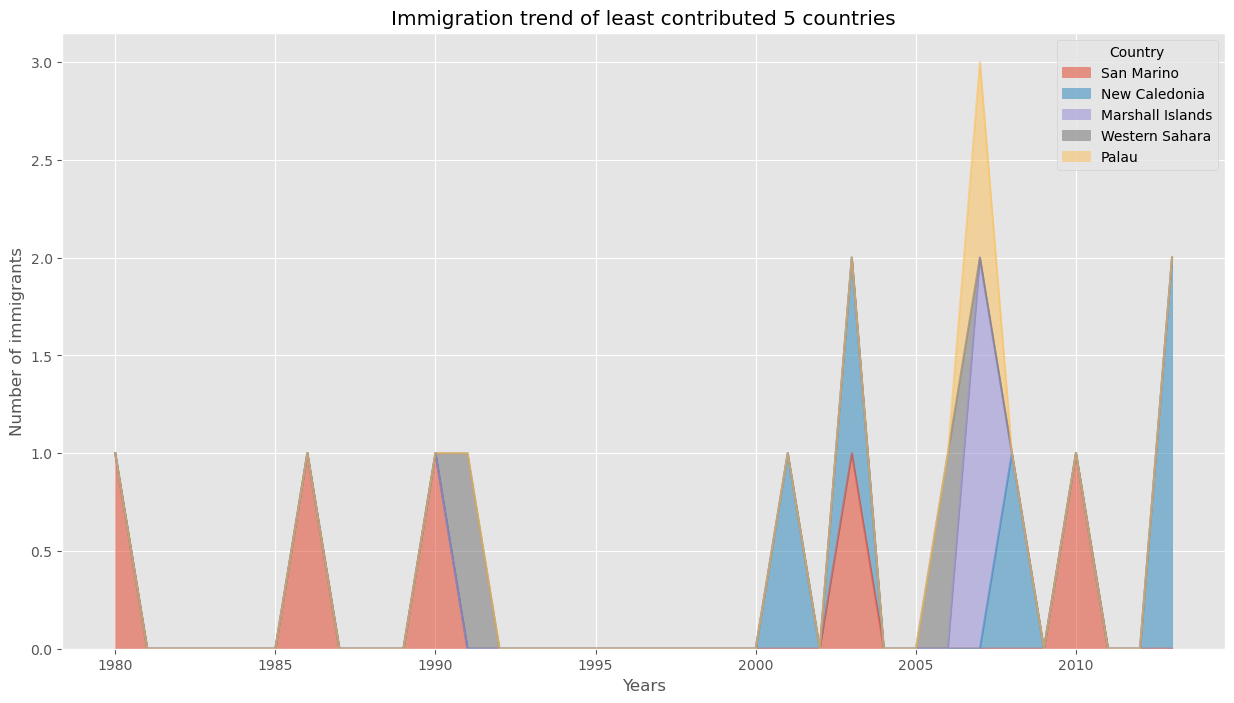

In [69]:
# Area plot of the least contributed countries

df_last5.plot(kind="area", alpha = 0.55, figsize =(15,8))
plt.title("Immigration trend of least contributed 5 countries")
plt.ylabel("Number of immigrants")
plt.xlabel('Years')
plt.show()

## Histograms

A histogram is a way of representing the *frequency* distribution of numeric dataset. The way it works is it partitions the x-axis into *bins*, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points in each bin. Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely.

**Question:** What is the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?

In [74]:
count,bin_edges = np.histogram(df['2013'])

print('Count: ', count)
print('Bin Edges: ', bin_edges)

Count:  [178  11   1   2   0   0   0   0   1   2]
Bin Edges:  [    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


By default, the `histrogram` method breaks up the dataset into 10 bins. The figure below summarizes the bin ranges and the frequency distribution of immigration in 2013. We can see that in 2013:

*   178 countries contributed between 0 to 3412.9 immigrants
*   11 countries contributed between 3412.9 to 6825.8 immigrants
*   1 country contributed between 6285.8 to 10238.7 immigrants, and so on..

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%202/images/Mod2Fig1-Histogram.jpg" align="center" width=800>


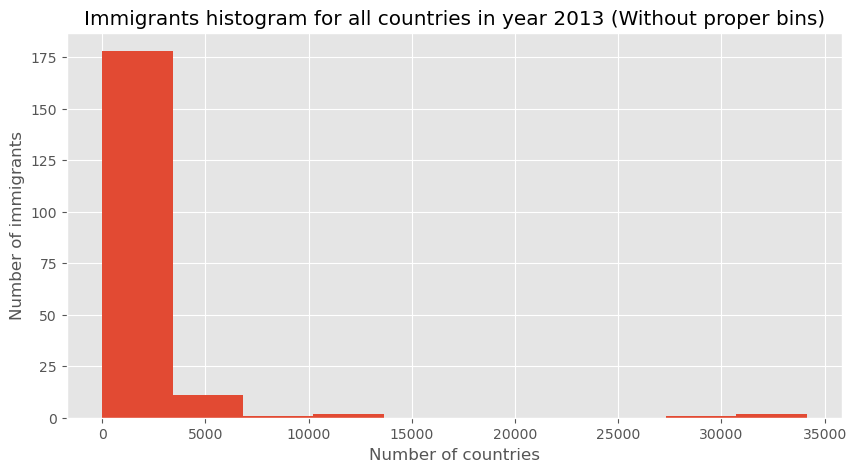

In [87]:
# Plot the histogram

df['2013'].plot(kind="hist", figsize=(10,5))

plt.title("Immigrants histogram for all countries in year 2013 (Without proper bins)")
plt.xlabel("Number of countries")
plt.ylabel("Number of immigrants")
plt.show()

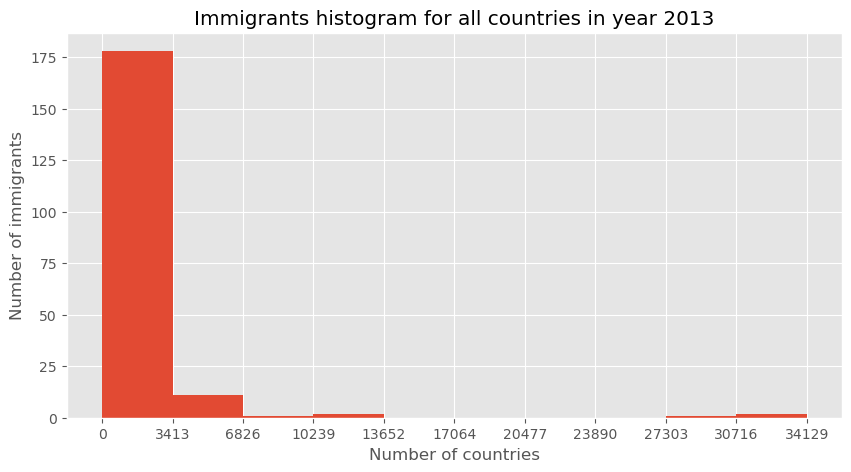

In [84]:
# Matching the bins with X-axis labels

df['2013'].plot(kind="hist", figsize=(10,5), xticks=bin_edges)

plt.title("Immigrants histogram for all countries in year 2013")
plt.xlabel("Number of countries")
plt.ylabel("Number of immigrants")
plt.show()

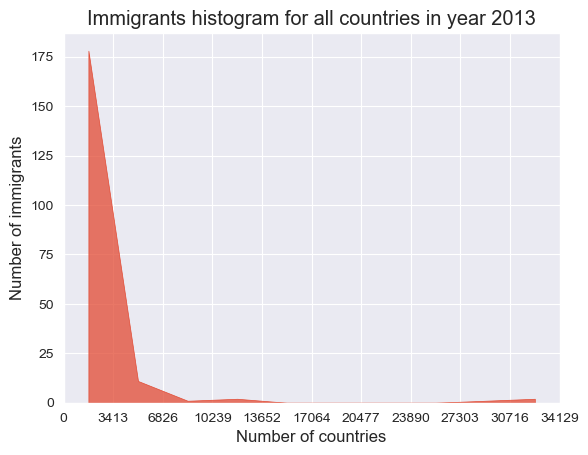

In [120]:
a = sns.histplot(df['2013'], bins=10, element="poly")
a.set_xticks(bin_edges)

plt.title("Immigrants histogram for all countries in year 2013")
plt.xlabel("Number of countries")
plt.ylabel("Number of immigrants")
plt.show()

### Multiple histograms in same plot

We can also plot multiple histograms on the same plot. For example, let's try to answer the following questions using a histogram.

**Question**: What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?


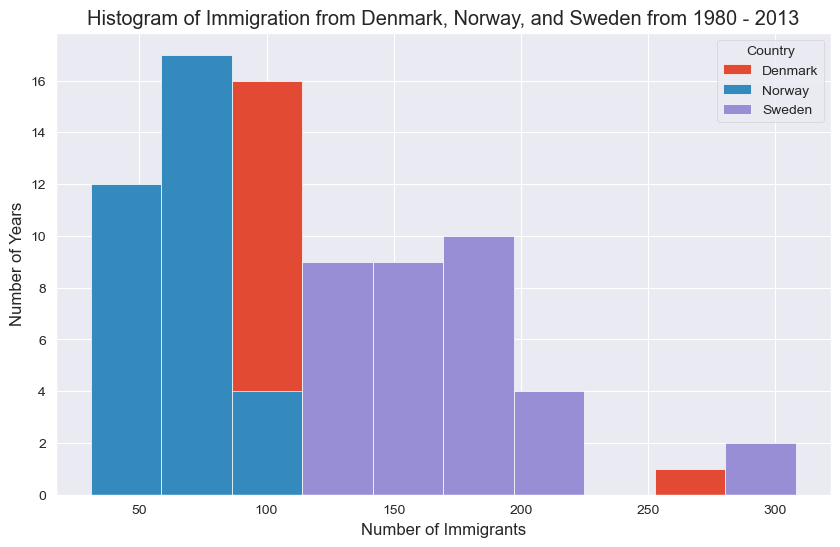

In [133]:
# Stacked basic histogram for multiple-labels

df_3 = df.loc[['Denmark', 'Norway', 'Sweden'], years]
df_3 = df_3.transpose()
df_3.plot(kind="hist", figsize=(10,6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Let's make a few modifications to improve the impact and aesthetics of the previous plot:

*   increase the bin size to 15 by passing in `bins` parameter;
*   set transparency to 60% by passing in `alpha` parameter;
*   label the x-axis by passing in `x-label` parameter;
*   change the colors of the plots by passing in `color` parameter.


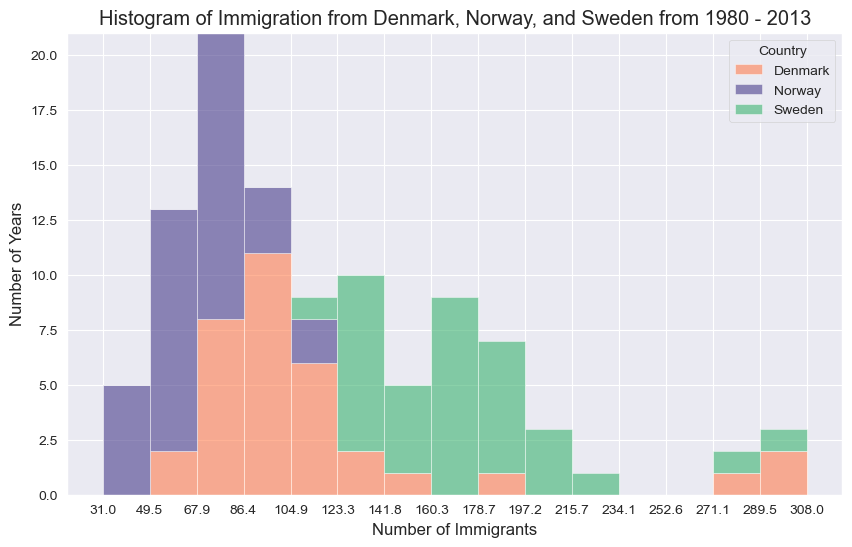

In [142]:
count, bin_edges = np.histogram(df_3, 15)

# Unstacked histogram
df_3.plot(kind="hist", 
          figsize=(10,6), 
          bins=15, 
          alpha=0.6, 
          xticks = bin_edges, 
          color=['coral', 'darkslateblue', 'mediumseagreen'], 
          stacked=True)

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

**Question**: Use the scripting layer to display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

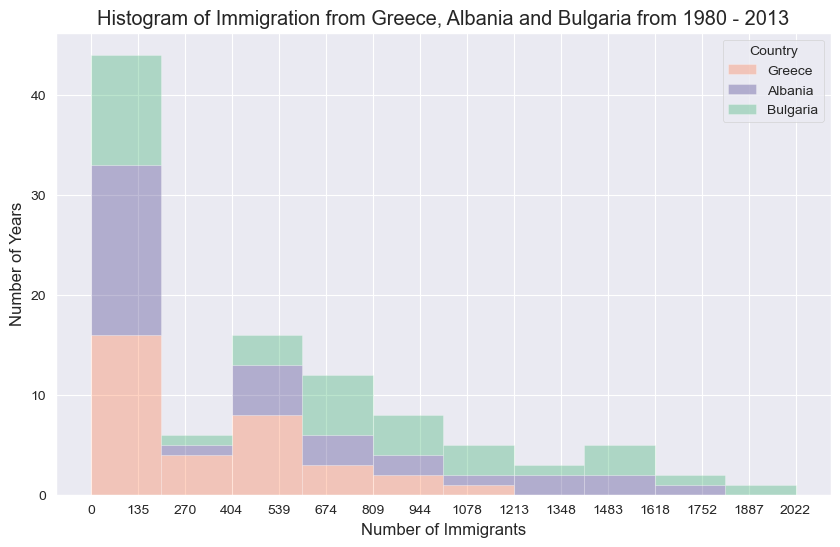

In [146]:
# Generate the required dataframe
df_assigned3 = df.loc[['Greece','Albania','Bulgaria'], years]
df_assigned3 = df_assigned3.transpose()

# Create bins
count, bin_edges = np.histogram(df_assigned3, bins=15)

df_assigned3.plot(kind="hist", 
                  figsize=(10,6),
                  xticks=bin_edges, 
                  alpha=0.35, 
                  color=['coral','darkslateblue', 'mediumseagreen'], 
                  stacked=True)

plt.title('Histogram of Immigration from Greece, Albania and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

## Bar Charts (Dataframe) <a id="10"></a>

A bar plot is a way of representing data where the *length* of the bars represents the magnitude/size of the feature/variable. Bar graphs usually represent numerical and categorical variables grouped in intervals.

To create a bar plot, we can pass one of two arguments via `kind` parameter in `plot()`:

*   `kind=bar` creates a *vertical* bar plot
*   `kind=barh` creates a *horizontal* bar plot

**Vertical bar plot**

In vertical bar graphs, the x-axis is used for labelling, and the length of bars on the y-axis corresponds to the magnitude of the variable being measured. Vertical bar graphs are particularly useful in analyzing time series data. One disadvantage is that they lack space for text labelling at the foot of each bar.

**Let's start off by analyzing the effect of Iceland's Financial Crisis:**

The 2008 - 2011 Icelandic Financial Crisis was a major economic and political event in Iceland. Relative to the size of its economy, Iceland's systemic banking collapse was the largest experienced by any country in economic history. The crisis led to a severe economic depression in 2008 - 2011 and significant political unrest.

**Question:** Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.


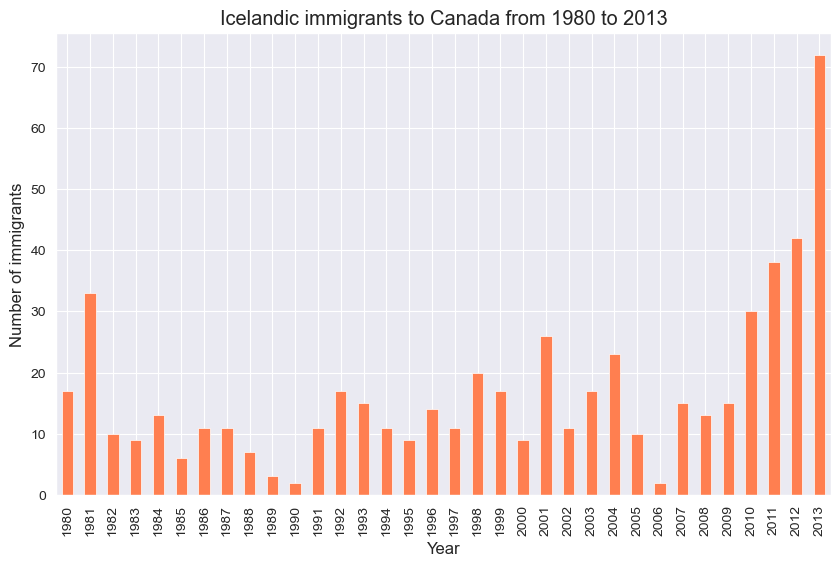

In [155]:
# Get the data
df_ice = df.loc['Iceland', years]

# Plot the data
df_ice.plot(kind="bar", figsize=(10,6), color="coral")
plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

The bar plot above shows the total number of immigrants broken down by each year. We can clearly see the impact of the financial crisis; the number of immigrants to Canada started increasing rapidly after 2008.

Let's annotate this on the plot using the `annotate` method of the **scripting layer** or the **pyplot interface**. We will pass in the following parameters:

*   `s`: str, the text of annotation.
*   `xy`: Tuple specifying the (x,y) point to annotate (in this case, end point of arrow).
*   `xytext`: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).
*   `xycoords`: The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default).
*   `arrowprops`: Takes a dictionary of properties to draw the arrow:
    *   `arrowstyle`: Specifies the arrow style, `'->'` is standard arrow.
    *   `connectionstyle`: Specifies the connection type. `arc3` is a straight line.
    *   `color`: Specifies color of arrow.
    *   `lw`: Specifies the line width.

I encourage you to read the Matplotlib documentation for more details on annotations:
<http://matplotlib.orsg/api/pyplot_api.html#matplotlib.pyplot.annotate>.


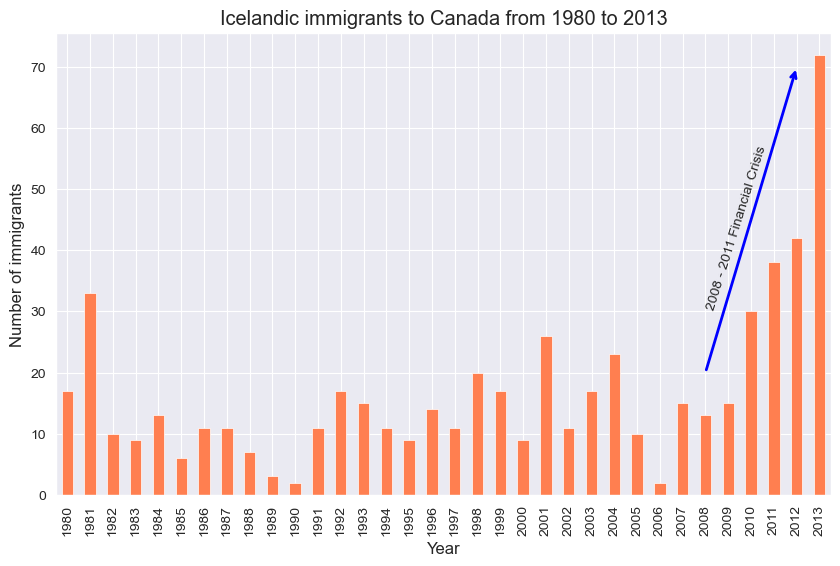

In [158]:
# Plot the data
df_ice.plot(kind="bar", figsize=(10,6), color="coral", rot=90)

plt.annotate('',  # s: str. Will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

#### Horizontal bar plot - Plotted using `kind=barh`